## **DICTIONARY**
1. **age** - age in years

2. **sex** - (1 = male; 0 = female)

3. **cp** - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. **chol** - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

7. **restecg** - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

8. **thalach** - maximum heart rate achieved

9. **exang** - exercise induced angina (1 = yes; 0 = no)

10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. **slope** - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

12. **ca** - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

13. **thal** - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [ ]:
# Importing the tools

# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/heart-disease.csv')

# **Data Exploration**

In [ ]:
df.shape

(303, 14)

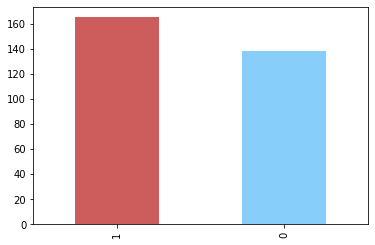

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['indianred', 'lightskyblue']);

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Heart Disease by sex

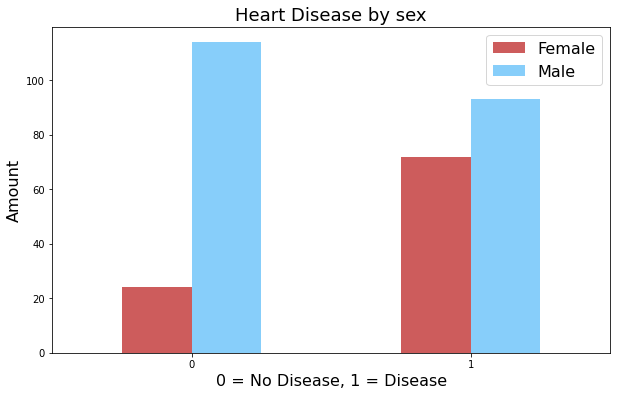

In [ ]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['indianred', 'lightskyblue'], figsize=(10,6))
plt.legend(['Female', 'Male'],fontsize=16)
plt.title('Heart Disease by sex', fontsize=18)
plt.xlabel('0 = No Disease, 1 = Disease', fontsize=16)
plt.ylabel('Amount',fontsize=16)
plt.xticks(rotation=0)
plt.show()

### Age vs. Maximum Heart Rate for Heart Disease

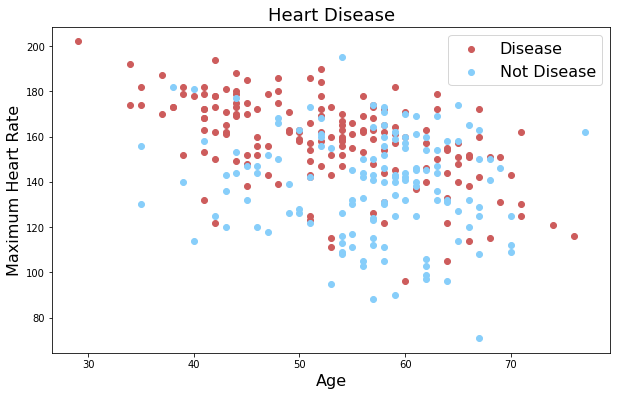

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df['age'][df['target'] == 1],
            df['thalach'][df['target'] == 1],
            c='indianred')

plt.scatter(df['age'][df['target'] == 0],
            df['thalach'][df['target'] == 0],
            c='lightskyblue')

plt.legend(['Disease', 'Not Disease'], fontsize=16)
plt.title('Heart Disease', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Maximum Heart Rate', fontsize=16)
plt.show()

### Check Age Distribution

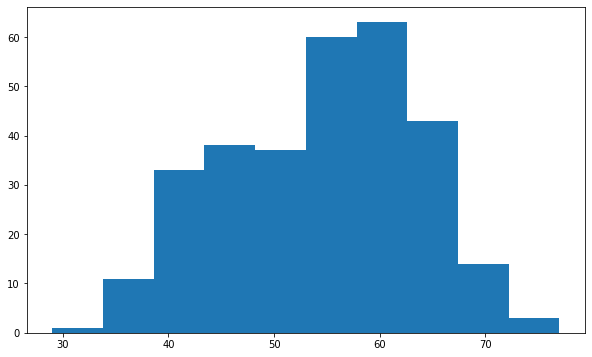

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(df['age']);

### Target Correlation Matrix

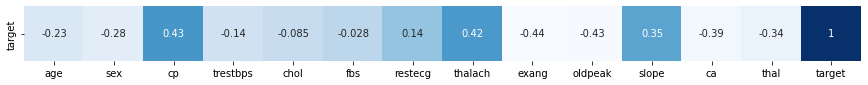

In [ ]:
corr_matrix = df.corr()[-1:]

fig, ax = plt.subplots(figsize=(15,1))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 cmap='Blues',
                 cbar=False)

# **Modelling**

In [ ]:
# Split Data into X and y

X = df.drop('target', axis=1)
y = df['target']

# Split data using train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Train multiple models and check which one performs better
np.random.seed(42)

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(f'The score for {name} is: {model.score(X_test, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The score for Logistic Regression is: 0.8852459016393442
The score for KNN is: 0.6885245901639344
The score for Random Forest is: 0.8360655737704918


In [ ]:
# Hyperparameter tuning 

logistic_regression_params = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]}

random_forest_params = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 4, 8], 
    'min_samples_leaf': [2, 3, 5, 10]
}

In [ ]:
# Tune Logistic Regression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=logistic_regression_params,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Tune Random Forest Classifier

np.random.seed(42)

rs_ran_for = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=random_forest_params,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_ran_for.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   verbose=True)

In [ ]:
rs_ran_for.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
 rs_ran_for.score(X_test, y_test)

0.8688524590163934

In [ ]:
# Tuning Logistic Regression model using GridSearchCV

logistic_regression_params = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=logistic_regression_params,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# **Evaluate Model**

In [ ]:
y_preds = gs_log_reg.predict(X_test)

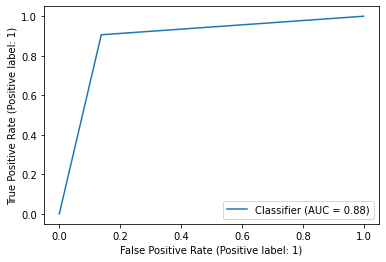

In [ ]:
# Plot ROC Curve

RocCurveDisplay.from_predictions(y_test, y_preds);

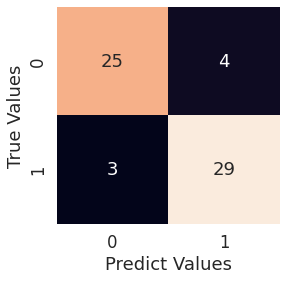

In [ ]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_matrix,
                 annot=True,
                 cbar=False
)
sns.set(font_scale=1.8)
plt.xlabel('Predict Values')
plt.ylabel('True Values')
fig.show()

In [ ]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



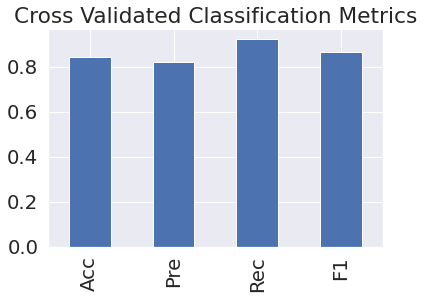

In [ ]:
# Calculate precision, score and f1

clf = LogisticRegression(C = 0.20433597178569418, 
                       solver = 'liblinear')

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy'
                         ).mean()

cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall'
                         ).mean()

cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision'
                         ).mean()

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1'
                         ).mean()

cv_evaluation = pd.DataFrame({
    'Acc': cv_acc,
    'Pre': cv_pre,
    'Rec': cv_rec,
    'F1': cv_f1
}, index=[0])

cv_evaluation.T.plot.bar(legend=False, title='Cross Validated Classification Metrics');

#**Importance of the Features**

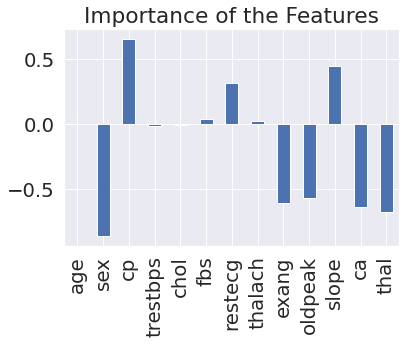

In [ ]:
clf.fit(X_train, y_train)

features_dictionary = dict(zip(df.columns, clf.coef_[0]))

features_df = pd.DataFrame(features_dictionary, index=[0])

features_df.T.plot.bar(legend=False, title='Importance of the Features')

# Saving the model

In [ ]:
import joblib

In [ ]:
joblib.dump(clf, filename="logistic_regression_classification_model.joblib")

['logistic_regression_classification_model.joblib']